In [16]:
using Pkg
using Plots
using CSV
theme(:solarized)
iris = CSV.read("iris_data.csv")
iris = iris[1:150,1:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [17]:
data1 = [[x[1],x[2],1.0, x[3] == "setosa" ? 1.0 : 0.0]
        for x in zip(iris[1:150,1], iris[1:150,3], iris[1:150,5])]

data2 = [[x[1],x[2],1.0,x[3] == "versicolor" ? 1.0 : 0.0]
        for x in zip(iris[1:150,1], iris[1:150,3], iris[1:150,5])]

data3 = [[x[1],x[2],1.0,x[3] == "virginica" ? 1.0 : 0.0]
        for x in zip(iris[1:150,1], iris[1:150,3], iris[1:150,5])]

150-element Array{Array{Float64,1},1}:
 [5.1, 1.4, 1.0, 0.0]
 [4.9, 1.4, 1.0, 0.0]
 [4.7, 1.3, 1.0, 0.0]
 [4.6, 1.5, 1.0, 0.0]
 [5.0, 1.4, 1.0, 0.0]
 [5.4, 1.7, 1.0, 0.0]
 [4.6, 1.4, 1.0, 0.0]
 [5.0, 1.5, 1.0, 0.0]
 [4.4, 1.4, 1.0, 0.0]
 [4.9, 1.5, 1.0, 0.0]
 [5.4, 1.5, 1.0, 0.0]
 [4.8, 1.6, 1.0, 0.0]
 [4.8, 1.4, 1.0, 0.0]
 ⋮
 [6.0, 4.8, 1.0, 1.0]
 [6.9, 5.4, 1.0, 1.0]
 [6.7, 5.6, 1.0, 1.0]
 [6.9, 5.1, 1.0, 1.0]
 [5.8, 5.1, 1.0, 1.0]
 [6.8, 5.9, 1.0, 1.0]
 [6.7, 5.7, 1.0, 1.0]
 [6.7, 5.2, 1.0, 1.0]
 [6.3, 5.0, 1.0, 1.0]
 [6.5, 5.2, 1.0, 1.0]
 [6.2, 5.4, 1.0, 1.0]
 [5.9, 5.1, 1.0, 1.0]

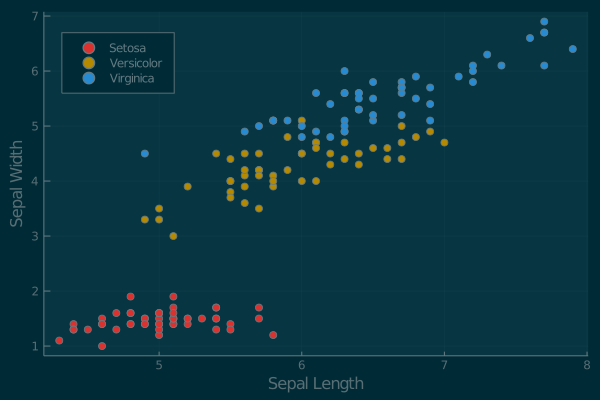

In [18]:
scatter([(x[1], x[2]) for x in data1 if x[4] == 1.0], 
    
        label = "Setosa", 
        xaxis = "Sepal Length",
        yaxis = "Sepal Width")
scatter!([(x[1], x[2]) for x in data2 if x[4] == 1.0], label = "Versicolor")
scatter!([(x[1], x[2]) for x in data3 if x[4] == 1.0], label = "Virginica", legend = :topleft)

In [19]:
σ(z) = 1.0/(1.0+exp(-z))

function loss_function(weights, data)
    return (-1.0/size(data)[1])*sum([x[4]*log(σ(weights'*x[1:3]))+(1.0-x[4])*log(1.0-σ(weights'*x[1:3]))
                                for x in data])
end

function ∇L(weights,data)
    w1 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[1] for x in data])
    w2 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[2] for x in data])
    w3 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[3] for x in data])
    return [w1, w2, w3]
end

function gradient_descent(data, α, ϵ)
    i = 1.0
    weights = rand(3)
    loss_history = []
    error_points = [(i, loss_function(weights, data))]
    while loss_function(weights, data) > ϵ && i < 100.0
        weights -= α.*∇L(weights, data)
        i += 1.0
        push!(loss_history,loss_function(weights,data))
        push!(error_points, (i, loss_function(weights, data)))
    end
    return weights, error_points, loss_history
end

function predict(W, x)
    if σ(W'*x[1:3]) >.50
        return 1
    else
        return 0
    end
end

function train(x)
    W1, P1 = gradient_descent(data1, 1.0, 0.00001)
    W2, P2 = gradient_descent(data2, 1.0, 0.00001)
    W3, P3 = gradient_descent(data3, 1.0, 0.00001)
    return W1, W2, W3
end

function predict_multi(x)
    W1, W2, W3 = train(x)
    return argmax([predict(W1, x), predict(W2, x), predict(W3, x)])
end

predict_multi (generic function with 1 method)

In [20]:

W1, P1, L1 = gradient_descent(data1, 1.0, 0.00001)
W2, P2, L2 = gradient_descent(data2, 1.0, 0.00001)
W3, P3, L3 = gradient_descent(data3, 1.0, 0.00001)

([-6.345399958839293, 11.250800235931234, -2.1264217541402832], [(1.0, 2.9336958928823704), (2.0, 9.351181744252813), (3.0, 1.0325281136303446), (4.0, 8.207798211083551), (5.0, 5.219385278524715), (6.0, 2.7023082631049986), (7.0, 7.256598724220523), (8.0, 0.5340021902548775), (9.0, 4.001309958893655), (10.0, 3.6228214238377787)  …  (91.0, 1.4215559999625274), (92.0, 2.9282112812674828), (93.0, 0.8854228421077096), (94.0, 2.2595498181728684), (95.0, 1.4002844669427277), (96.0, 2.826944381230511), (97.0, 0.9030512235221877), (98.0, 2.185483217005484), (99.0, 1.3762395753580388), (100.0, 2.722618200623213)], Any[9.351181744252813, 1.0325281136303446, 8.207798211083551, 5.219385278524715, 2.7023082631049986, 7.256598724220523, 0.5340021902548775, 4.001309958893655, 3.6228214238377787, 6.211092267322628  …  1.4215559999625274, 2.9282112812674828, 0.8854228421077096, 2.2595498181728684, 1.4002844669427277, 2.826944381230511, 0.9030512235221877, 2.185483217005484, 1.3762395753580388, 2.722618

In [21]:
predict_multi(data1[130])

3

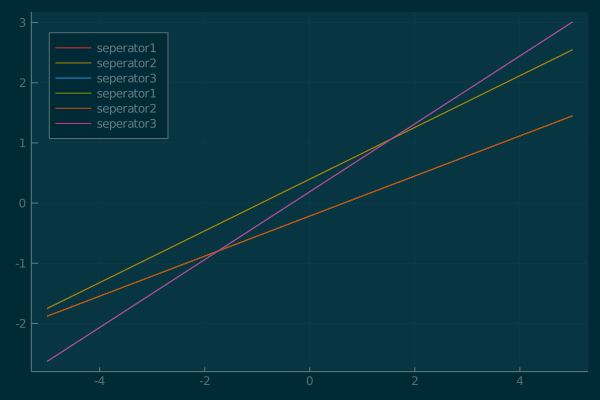

In [25]:

plot!(x-> -(W1[1]/W1[2])*x - (W1[3]/W1[2]), label = "seperator1", legend = :topleft)

plot!(x-> -(W2[1]/W2[2])*x - (W2[3]/W2[2]), label = "seperator2")

plot!(x-> -(W3[1]/W3[2])*x - (W3[3]/W3[2]), label = "seperator3")